<a href="https://www.kaggle.com/code/taf1404/churn-modelling-with-ensemble-learning?scriptVersionId=123860404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In this notebook I tried to analyze customer churn dataset based on `bagging and boosting techniques`. This task is given as part of <b>ml course assignment 3</b>. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(42)

In [2]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
4684,4685,15736963,Herring,623,France,Male,43,1,0.00,2,1,1,146379.30,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0
6340,6341,15659064,Salas,790,Spain,Male,37,8,0.00,2,1,1,149418.41,0
576,577,15761986,Obialo,439,Spain,Female,32,3,138901.61,1,1,0,75685.97,0
5202,5203,15713354,Morrice,597,Germany,Female,22,6,101528.61,1,1,0,70529.00,1
6363,6364,15593454,Lambert,678,Spain,Female,40,4,113794.22,1,1,0,16618.76,0
439,440,15690134,Hughes,464,Germany,Female,42,3,85679.25,1,1,1,164104.74,0


In [4]:
df.shape

(10000, 14)

<b>Data Defenition:</b>
* RowNumber - index of customers
* CustomerId - unique customer identification of customers
* Surname - surname of customer
* CreditScore - estimated credit score of each customer ranging from 350 to 850
* Geography - location of customer one of 3 countries France, Spain or Germany
* Gender - male or female
* Age - age
* Tenure - I don't know
* Balance - customer's balance on credit card
* NumOfProducts - number of products customer purchased from company
* HasCrCard - whether customer connected Credit Card to the system
* IsActiveMember - whether customer frequently uses company's products
* EstimatedSalary - estimated salary of customer
* Exited - whether customer churned or not

### Because of customers privacy, removing private columns is best option

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include=object)

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

### EDA

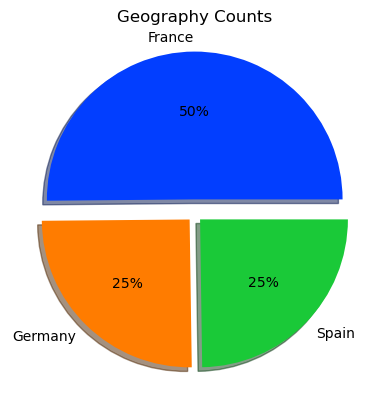

In [11]:
tt = df['Geography'].value_counts()
explode = [0.1, 0.05, 0.05]
colors = sns.color_palette('bright')
plt.pie(tt, labels=tt.index, colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Geography Counts')
plt.show()

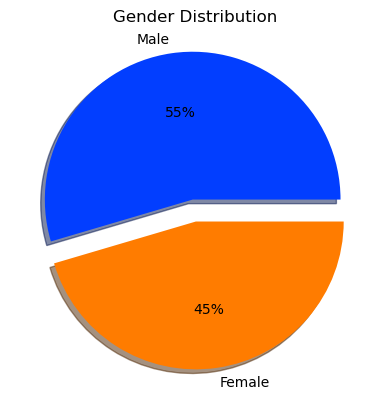

In [12]:
tt = df['Gender'].value_counts()
explode = [0.1, 0.05]
colors = sns.color_palette('bright')
plt.pie(tt, labels=tt.index, colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Gender Distribution')
plt.show()

In [13]:
cat_features_t = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Geography','Gender']
cont_features_t = ['CreditScore','Age','Balance','EstimatedSalary']

<b>For better visualization</b> i use `countplot` for categorical features, `hist plot and distribution` for continious features  

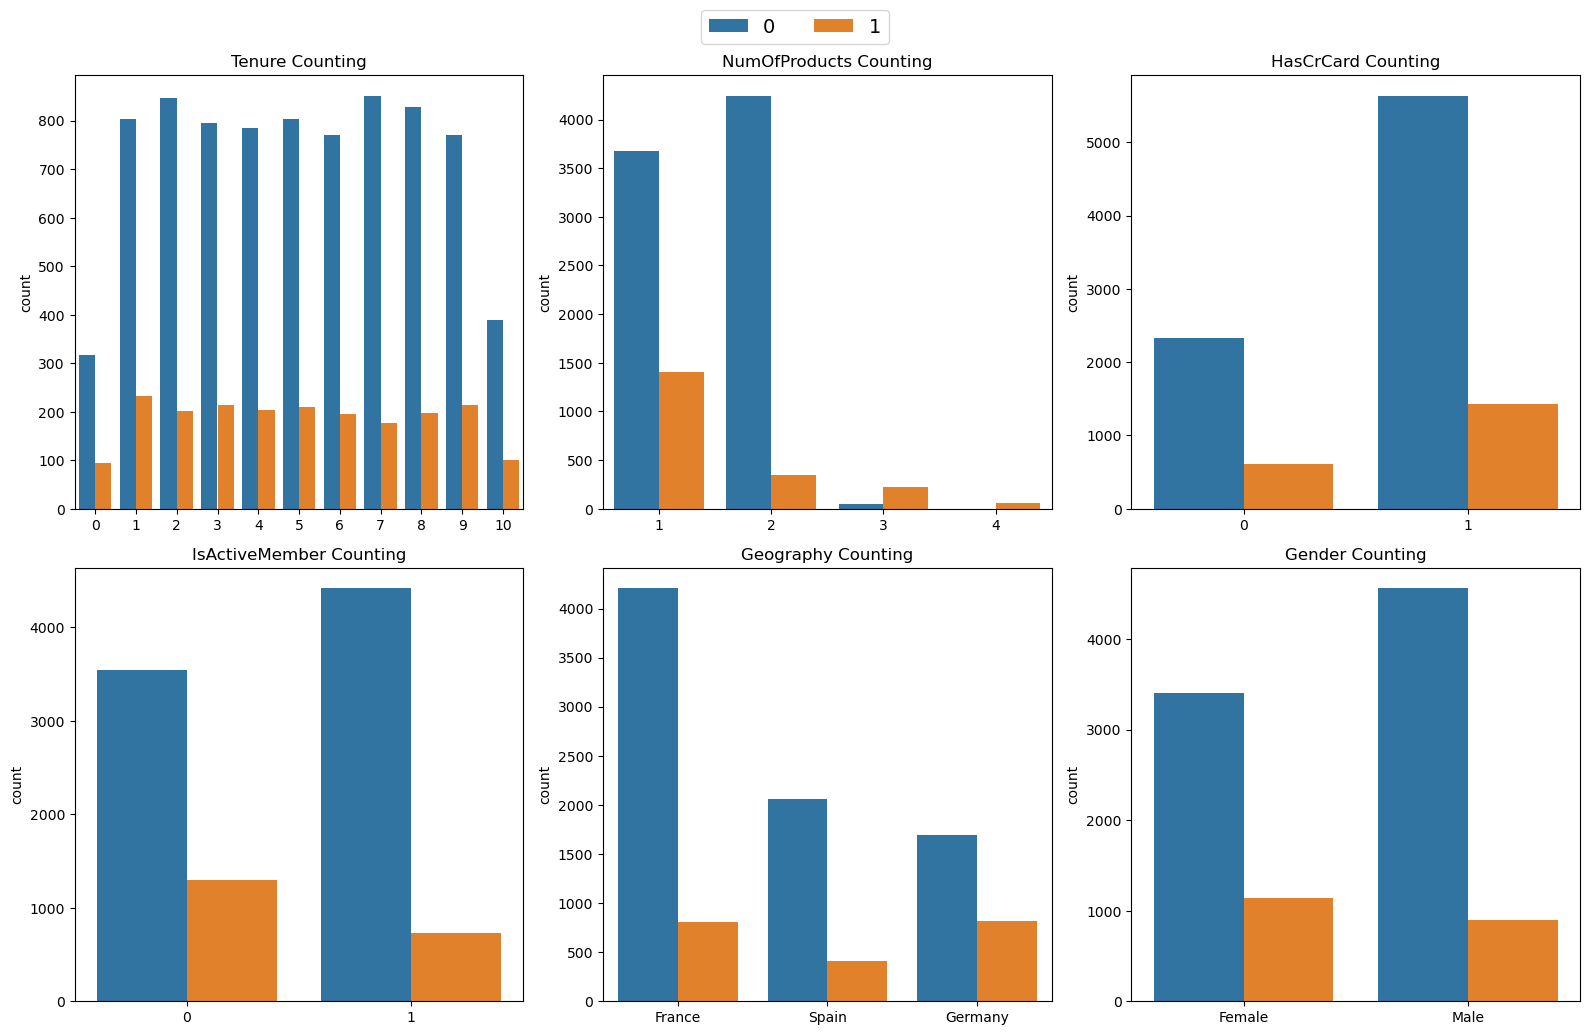

In [14]:
import math
n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}
n_cols = 3
n_rows = math.ceil(len(cat_features_t)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()
for i, column in enumerate(cat_features_t):
    plot_axes = [ax[i]]
    
    sns.countplot(x = df[column], hue=df['Exited'],
        ax=ax[i]
    )

    # titles
    ax[i].set_title(f'{column} Counting');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()

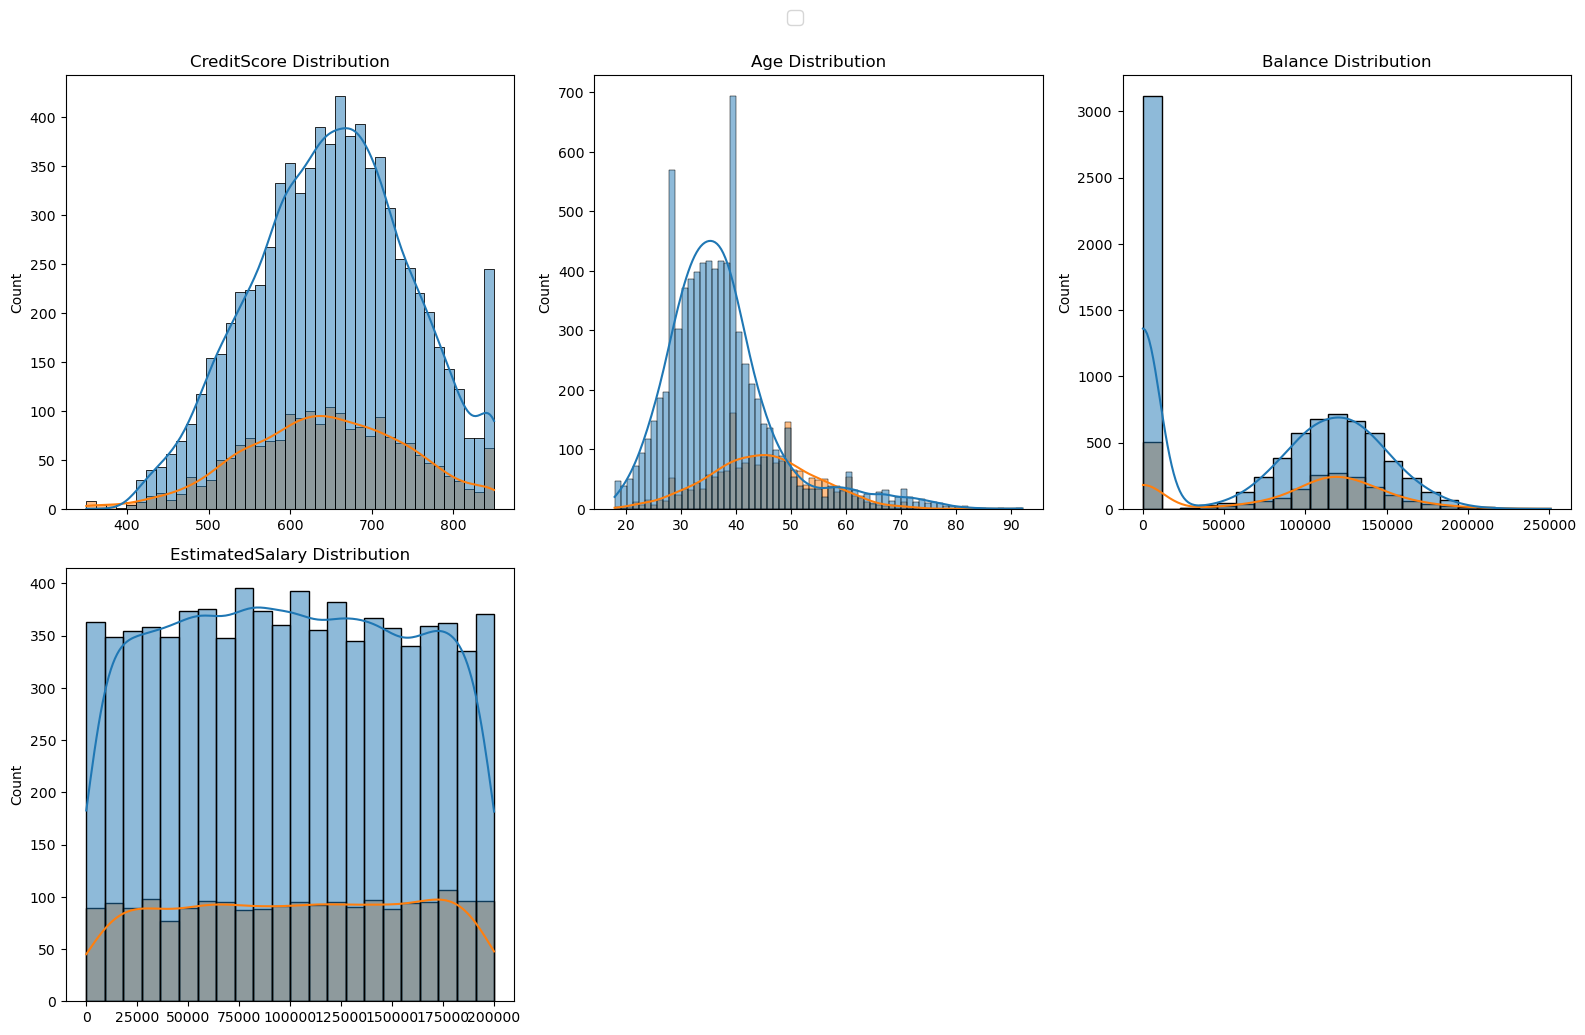

In [15]:
n_rows = math.ceil(len(cont_features_t)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()
for i, column in enumerate(cont_features_t):
    plot_axes = [ax[i]]
    
    sns.histplot(x = df[column], hue=df['Exited'],kde=True,
        ax=ax[i]
    )

    # titles
    ax[i].set_title(f'{column} Distribution');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()

<b>Highlight</b>
* From above graphs we can see that Target value not Balanced so we use F-1 score since it is best metric for classification task

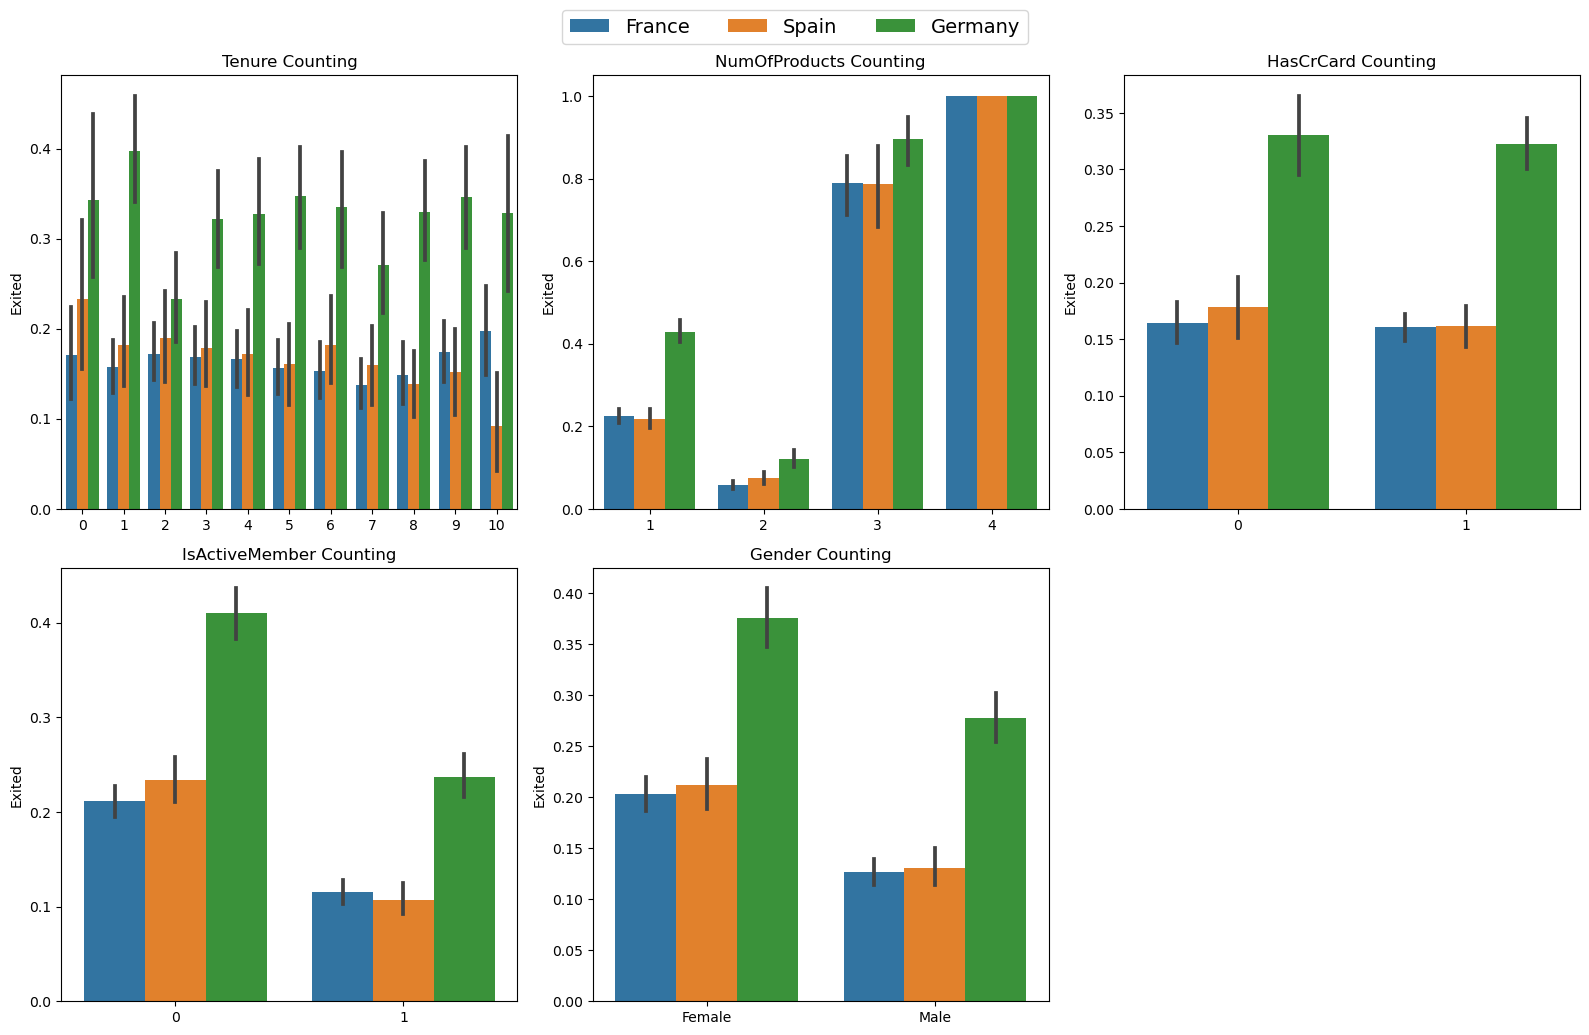

In [16]:
n_rows = math.ceil(len(cat_features_t)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()
for i, column in enumerate(['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Gender']):
    plot_axes = [ax[i]]
    
    sns.barplot(x = df[column], y=df['Exited'], hue=df['Geography'],
        ax=ax[i]
    )

    # titles
    ax[i].set_title(f'{column} Counting');
    ax[i].set_xlabel(None)
    
    # remove axes to show only one at the end
    plot_axes = [ax[i]]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.04), fontsize=14, ncol=3)
plt.tight_layout()

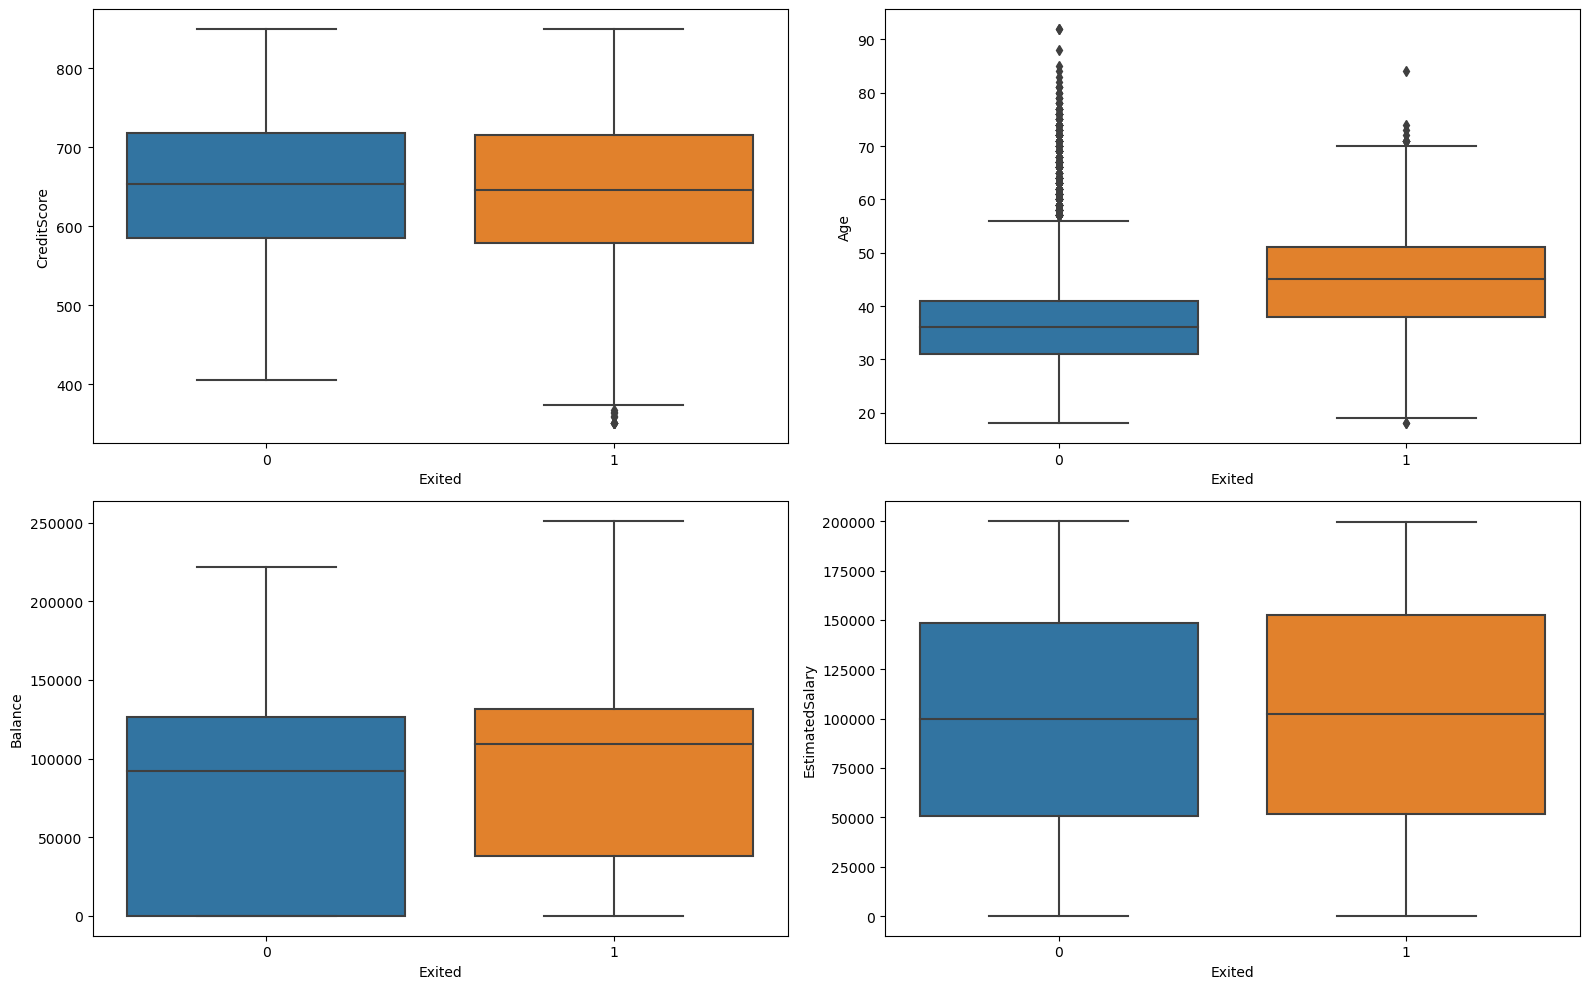

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

* In Order to deal with outliers and getting better score i created `log` version of two cat columns

In [18]:
df['log_salary'] = np.log(df['EstimatedSalary'])
df['log_score'] = np.log(df['CreditScore'])

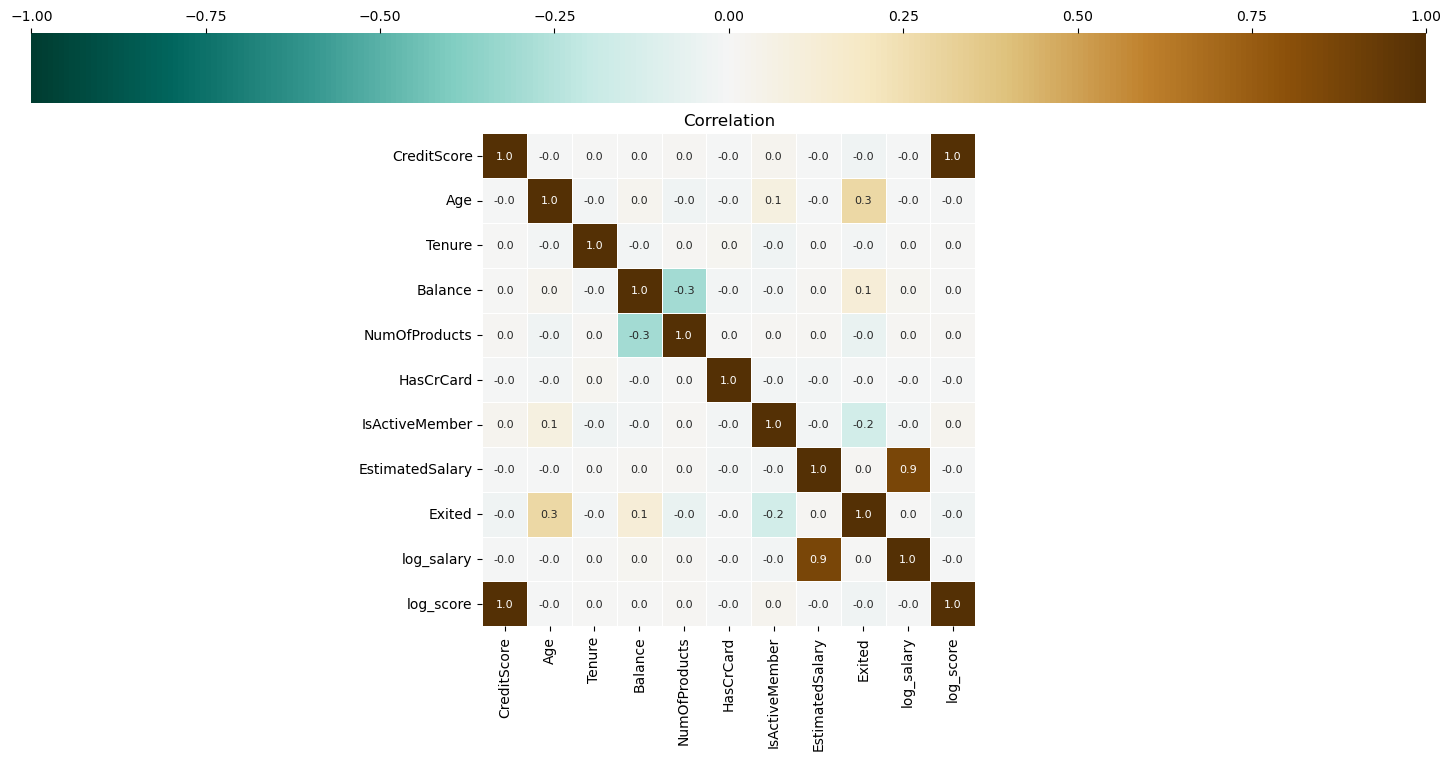

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0,
            linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r', 
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9))
plt.title('Correlation')
plt.show()

### one-hot-encoder >>> get_dummies 
Since get dummies easy to use then one-hot encoder and the result are the same, i used pandas get dummies for encoding categorical features

In [20]:
data = pd.get_dummies(data = df, columns = ['Geography', 'Gender'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,log_salary,log_score,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,11.526324,6.428105,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,11.631087,6.410175,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,11.643353,6.218600,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,11.449204,6.549651,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,11.278267,6.745236,0,0,1,1,0


In [21]:
df.drop(['Gender','Geography'],axis=1,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited',axis=1)
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

# XGBoost
Since XGBoost optimazed implementation of Gradient Boosting, we use it first 

In [23]:
#performing grid search to find best hyperparameter
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=42)
parameter_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=5,random_state=0,shuffle=True)

grid_search_XGB = GridSearchCV(XGB,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                            n_jobs=-1,
                            verbose=0)

grid_search_XGB.fit(X_train, y_train)
print('Best score: {}'.format(grid_search_XGB.best_score_))
print('Best parameters: {}'.format(grid_search_XGB.best_params_))

Best score: 0.8572
Best parameters: {'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}


In [24]:
y_pred = grid_search_XGB.predict(X_test)
f1_score(y_pred,y_test)

0.5749086479902558

In [25]:
best_XGB = XGBClassifier(colsample_bytree= 0.8, gamma= 2, max_depth=3, min_child_weight=1, subsample=1.0)

# Voting Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

log_clf = LogisticRegression() 
rnd_clf = RandomForestClassifier() 
svm_clf = SVC(probability=True) 
knn_clf = KNeighborsClassifier()

voting_clf = VotingClassifier( 
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf),('knn',knn_clf)],
    voting='soft') 
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [27]:
from sklearn.metrics import accuracy_score
y_pred = voting_clf.predict(X_test)
f1_score(y_pred,y_test),accuracy_score(y_pred,y_test)

(0.04980842911877395, 0.8016)

In [28]:
from sklearn.model_selection import cross_val_score
val_voting = cross_val_score(voting_clf, X, y, cv=cross_validation,scoring='f1_macro')
val_voting.mean()

0.4692584532198901

# Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier 
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, max_samples=100, 
                            bootstrap=True, n_jobs=-1) 
bag_clf.fit(X_train, y_train) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [30]:
y_pred = bag_clf.predict(X_test)
f1_score(y_pred,y_test),accuracy_score(y_pred,y_test)

(0.518918918918919, 0.8576)

In [31]:
val_bagging = cross_val_score(bag_clf, X, y, cv=cross_validation,scoring='f1_macro')
val_bagging.mean()

0.7050699998325098

# Pasting
Pasting is similar to Bagging but we need set `bootstrap` to <b>False</b>

In [32]:
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier
pas_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, max_samples=100, 
                            bootstrap=False, n_jobs=-1) 
pas_clf.fit(X_train, y_train) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [33]:
y_pred = pas_clf.predict(X_test)
f1_score(y_pred,y_test),accuracy_score(y_pred,y_test)

(0.5197278911564627, 0.8588)

In [34]:
val_pasting = cross_val_score(pas_clf, X, y, cv=cross_validation,scoring='f1_macro')
val_pasting.mean()

0.7037052510244821

# Extra Tree 
When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds

In [35]:
extra = ExtraTreesClassifier()

extra.fit(X_train, y_train) 

ExtraTreesClassifier()

In [36]:
y_pred = extra.predict(X_test)
f1_score(y_pred,y_test),accuracy_score(y_pred,y_test)

(0.526448362720403, 0.8496)

In [37]:
val_extra = cross_val_score(extra, X, y, cv=cross_validation,scoring='f1_macro')
val_extra.mean()

0.7166054383883165

# Ada Boost

In [38]:
from sklearn.ensemble import AdaBoostClassifier 
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [39]:
y_pred = ada_clf.predict(X_test)
f1_score(y_pred,y_test),accuracy_score(y_pred,y_test)

(0.5555555555555556, 0.8496)

In [40]:
val_ada = cross_val_score(ada_clf, X, y, cv=cross_validation,scoring='f1_macro')
val_ada.mean()

0.7273157049560108

<b>Conclusion:</b>
Even though voting classiffier accuracy metric is slightly lower than others, its f_1 score is significanly high 